<a href="https://colab.research.google.com/github/JeffLangballe/what-burger/blob/master/BigMacWhopper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    604      0 --:--:-- --:--:-- --:--:--   603
Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Lets get some images of Big Macs and Whoppers

In [0]:
folder = 'big_mac'
file = 'urls_big_mac.csv'

In [0]:
folder = 'whopper'
file = 'urls_whopper.csv'

In [0]:
path = Path(base_dir + 'data/burgers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/burgers/urls_whopper.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/burgers/urls_big_mac.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/burgers/big_mac'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/burgers/whopper')]

In [0]:
classes = ['big_mac', 'whopper']

In [0]:
download_images(path/file, dest, max_pics=200)

Remove images that can't be opened

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Let's look at what we got

In [0]:
np.random.seed(111)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
           ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
np.random.seed(111)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['big_mac', 'whopper']

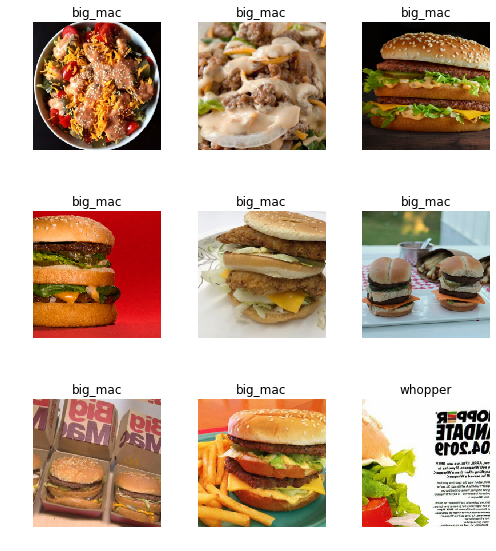

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['big_mac', 'whopper'], 2, 292, 72)

Okay lets train the model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 24735746.85it/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.812569,0.877431,0.458333,00:35
1,0.656144,0.683083,0.347222,00:06
2,0.536987,0.438892,0.180556,00:06
3,0.469778,0.365191,0.152778,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


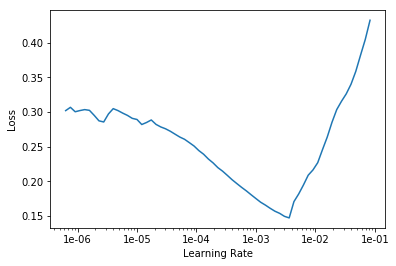

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.314319,0.361709,0.138889,00:07
1,0.232431,0.340321,0.097222,00:07


In [0]:
learn.save('stage-2')

Let's see how we did and if we can make it better

In [18]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (292 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
whopper,whopper,whopper,whopper,whopper
Path: /content/gdrive/My Drive/fastai-v3/data/burgers;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
whopper,big_mac,whopper,big_mac,big_mac
Path: /content/gdrive/My Drive/fastai-v3/data/burgers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

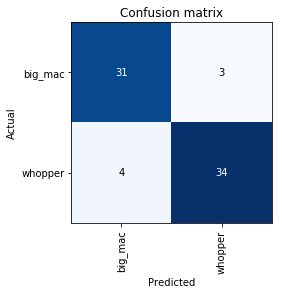

In [27]:
interp.plot_confusion_matrix()

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

TypeError: ignored

In [0]:
db = (ImageList.from_folder(path)
                           .no_split()
                           .label_from_folder()
                           .transform(get_transforms(), size=224)
                           .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:180: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (376 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
big_mac,big_mac,big_mac,big_mac,big_mac
Path: /content/gdrive/My Drive/fastai-v3/data/burgers;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/fastai-v3/data/burgers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
       

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

##Using the model

In [0]:
learn.export()

In [0]:
learn = load_learner(path)

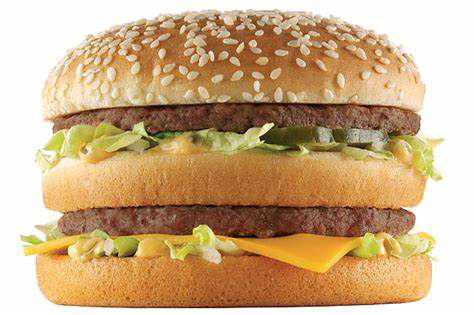

In [32]:
img = open_image(path/'manual_test'/'mysteryburger1.jpeg')
img

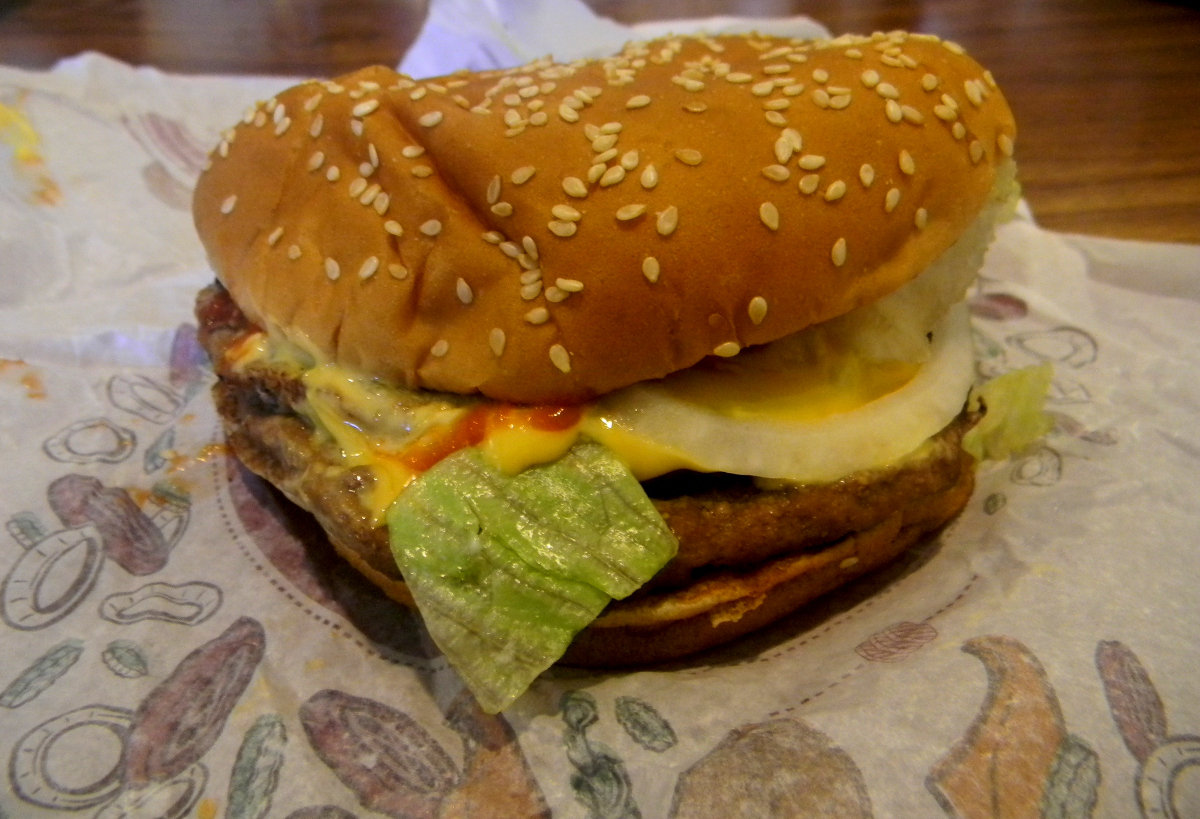

In [34]:
img = open_image(path/'manual_test'/'mysteryburger2.jpg')
img

In [35]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category whopper